# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

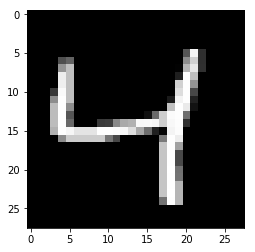

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [13]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

inputs_ = tf.placeholder(tf.float32, [None, 784])
targets_ = tf.placeholder(tf.float32, [None, 784])

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(inputs_, 784)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [14]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [15]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.7071
Epoch: 1/20... Training loss: 0.6707
Epoch: 1/20... Training loss: 0.6372
Epoch: 1/20... Training loss: 0.6064
Epoch: 1/20... Training loss: 0.5763
Epoch: 1/20... Training loss: 0.5519
Epoch: 1/20... Training loss: 0.5258
Epoch: 1/20... Training loss: 0.4994
Epoch: 1/20... Training loss: 0.4813
Epoch: 1/20... Training loss: 0.4623
Epoch: 1/20... Training loss: 0.4387
Epoch: 1/20... Training loss: 0.4270
Epoch: 1/20... Training loss: 0.4096
Epoch: 1/20... Training loss: 0.4019
Epoch: 1/20... Training loss: 0.3877
Epoch: 1/20... Training loss: 0.3830
Epoch: 1/20... Training loss: 0.3622
Epoch: 1/20... Training loss: 0.3632
Epoch: 1/20... Training loss: 0.3474
Epoch: 1/20... Training loss: 0.3418
Epoch: 1/20... Training loss: 0.3368
Epoch: 1/20... Training loss: 0.3286
Epoch: 1/20... Training loss: 0.3184
Epoch: 1/20... Training loss: 0.3168
Epoch: 1/20... Training loss: 0.3124
Epoch: 1/20... Training loss: 0.3057
Epoch: 1/20... Training loss: 0.3032
E

Epoch: 1/20... Training loss: 0.1631
Epoch: 1/20... Training loss: 0.1557
Epoch: 1/20... Training loss: 0.1575
Epoch: 1/20... Training loss: 0.1601
Epoch: 1/20... Training loss: 0.1574
Epoch: 1/20... Training loss: 0.1631
Epoch: 1/20... Training loss: 0.1648
Epoch: 1/20... Training loss: 0.1549
Epoch: 1/20... Training loss: 0.1576
Epoch: 1/20... Training loss: 0.1559
Epoch: 1/20... Training loss: 0.1609
Epoch: 1/20... Training loss: 0.1630
Epoch: 1/20... Training loss: 0.1554
Epoch: 1/20... Training loss: 0.1554
Epoch: 1/20... Training loss: 0.1601
Epoch: 1/20... Training loss: 0.1602
Epoch: 1/20... Training loss: 0.1511
Epoch: 1/20... Training loss: 0.1595
Epoch: 1/20... Training loss: 0.1575
Epoch: 1/20... Training loss: 0.1564
Epoch: 1/20... Training loss: 0.1494
Epoch: 1/20... Training loss: 0.1588
Epoch: 1/20... Training loss: 0.1552
Epoch: 1/20... Training loss: 0.1590
Epoch: 1/20... Training loss: 0.1562
Epoch: 1/20... Training loss: 0.1544
Epoch: 1/20... Training loss: 0.1532
E

Epoch: 2/20... Training loss: 0.1344
Epoch: 2/20... Training loss: 0.1286
Epoch: 2/20... Training loss: 0.1346
Epoch: 2/20... Training loss: 0.1303
Epoch: 2/20... Training loss: 0.1301
Epoch: 2/20... Training loss: 0.1299
Epoch: 2/20... Training loss: 0.1328
Epoch: 2/20... Training loss: 0.1297
Epoch: 2/20... Training loss: 0.1257
Epoch: 2/20... Training loss: 0.1282
Epoch: 2/20... Training loss: 0.1257
Epoch: 2/20... Training loss: 0.1305
Epoch: 2/20... Training loss: 0.1314
Epoch: 2/20... Training loss: 0.1292
Epoch: 2/20... Training loss: 0.1315
Epoch: 2/20... Training loss: 0.1369
Epoch: 2/20... Training loss: 0.1271
Epoch: 2/20... Training loss: 0.1322
Epoch: 2/20... Training loss: 0.1291
Epoch: 2/20... Training loss: 0.1328
Epoch: 2/20... Training loss: 0.1312
Epoch: 2/20... Training loss: 0.1312
Epoch: 2/20... Training loss: 0.1320
Epoch: 2/20... Training loss: 0.1363
Epoch: 2/20... Training loss: 0.1308
Epoch: 2/20... Training loss: 0.1265
Epoch: 2/20... Training loss: 0.1261
E

Epoch: 3/20... Training loss: 0.1196
Epoch: 3/20... Training loss: 0.1143
Epoch: 3/20... Training loss: 0.1172
Epoch: 3/20... Training loss: 0.1160
Epoch: 3/20... Training loss: 0.1161
Epoch: 3/20... Training loss: 0.1177
Epoch: 3/20... Training loss: 0.1137
Epoch: 3/20... Training loss: 0.1184
Epoch: 3/20... Training loss: 0.1165
Epoch: 3/20... Training loss: 0.1189
Epoch: 3/20... Training loss: 0.1117
Epoch: 3/20... Training loss: 0.1171
Epoch: 3/20... Training loss: 0.1164
Epoch: 3/20... Training loss: 0.1127
Epoch: 3/20... Training loss: 0.1181
Epoch: 3/20... Training loss: 0.1167
Epoch: 3/20... Training loss: 0.1164
Epoch: 3/20... Training loss: 0.1158
Epoch: 3/20... Training loss: 0.1129
Epoch: 3/20... Training loss: 0.1159
Epoch: 3/20... Training loss: 0.1195
Epoch: 3/20... Training loss: 0.1114
Epoch: 3/20... Training loss: 0.1153
Epoch: 3/20... Training loss: 0.1149
Epoch: 3/20... Training loss: 0.1145
Epoch: 3/20... Training loss: 0.1138
Epoch: 3/20... Training loss: 0.1143
E

Epoch: 3/20... Training loss: 0.1080
Epoch: 3/20... Training loss: 0.1085
Epoch: 3/20... Training loss: 0.1106
Epoch: 3/20... Training loss: 0.1087
Epoch: 3/20... Training loss: 0.1058
Epoch: 3/20... Training loss: 0.1126
Epoch: 3/20... Training loss: 0.1083
Epoch: 3/20... Training loss: 0.1092
Epoch: 3/20... Training loss: 0.1102
Epoch: 4/20... Training loss: 0.1073
Epoch: 4/20... Training loss: 0.1071
Epoch: 4/20... Training loss: 0.1058
Epoch: 4/20... Training loss: 0.1088
Epoch: 4/20... Training loss: 0.1120
Epoch: 4/20... Training loss: 0.1088
Epoch: 4/20... Training loss: 0.1102
Epoch: 4/20... Training loss: 0.1057
Epoch: 4/20... Training loss: 0.1058
Epoch: 4/20... Training loss: 0.1063
Epoch: 4/20... Training loss: 0.1051
Epoch: 4/20... Training loss: 0.1041
Epoch: 4/20... Training loss: 0.1087
Epoch: 4/20... Training loss: 0.1077
Epoch: 4/20... Training loss: 0.1110
Epoch: 4/20... Training loss: 0.1069
Epoch: 4/20... Training loss: 0.1064
Epoch: 4/20... Training loss: 0.1084
E

Epoch: 4/20... Training loss: 0.0995
Epoch: 4/20... Training loss: 0.0987
Epoch: 4/20... Training loss: 0.1010
Epoch: 4/20... Training loss: 0.1003
Epoch: 4/20... Training loss: 0.1000
Epoch: 4/20... Training loss: 0.1002
Epoch: 4/20... Training loss: 0.1005
Epoch: 4/20... Training loss: 0.1038
Epoch: 4/20... Training loss: 0.1020
Epoch: 4/20... Training loss: 0.1004
Epoch: 4/20... Training loss: 0.1017
Epoch: 4/20... Training loss: 0.1008
Epoch: 4/20... Training loss: 0.1002
Epoch: 4/20... Training loss: 0.0968
Epoch: 4/20... Training loss: 0.1049
Epoch: 4/20... Training loss: 0.1010
Epoch: 4/20... Training loss: 0.1012
Epoch: 4/20... Training loss: 0.0998
Epoch: 4/20... Training loss: 0.1002
Epoch: 4/20... Training loss: 0.1022
Epoch: 4/20... Training loss: 0.1015
Epoch: 4/20... Training loss: 0.1001
Epoch: 4/20... Training loss: 0.1011
Epoch: 4/20... Training loss: 0.0999
Epoch: 4/20... Training loss: 0.0993
Epoch: 4/20... Training loss: 0.1016
Epoch: 4/20... Training loss: 0.1015
E

Epoch: 5/20... Training loss: 0.0947
Epoch: 5/20... Training loss: 0.0980
Epoch: 5/20... Training loss: 0.0973
Epoch: 5/20... Training loss: 0.0968
Epoch: 5/20... Training loss: 0.0979
Epoch: 5/20... Training loss: 0.0962
Epoch: 5/20... Training loss: 0.0947
Epoch: 5/20... Training loss: 0.0983
Epoch: 5/20... Training loss: 0.0990
Epoch: 5/20... Training loss: 0.0956
Epoch: 5/20... Training loss: 0.0966
Epoch: 5/20... Training loss: 0.0956
Epoch: 5/20... Training loss: 0.0953
Epoch: 5/20... Training loss: 0.0970
Epoch: 5/20... Training loss: 0.0946
Epoch: 5/20... Training loss: 0.0976
Epoch: 5/20... Training loss: 0.0990
Epoch: 5/20... Training loss: 0.0937
Epoch: 5/20... Training loss: 0.0977
Epoch: 5/20... Training loss: 0.0948
Epoch: 5/20... Training loss: 0.0946
Epoch: 5/20... Training loss: 0.0940
Epoch: 5/20... Training loss: 0.0917
Epoch: 5/20... Training loss: 0.0938
Epoch: 5/20... Training loss: 0.0980
Epoch: 5/20... Training loss: 0.0966
Epoch: 5/20... Training loss: 0.0967
E

Epoch: 6/20... Training loss: 0.0943
Epoch: 6/20... Training loss: 0.0917
Epoch: 6/20... Training loss: 0.0934
Epoch: 6/20... Training loss: 0.0911
Epoch: 6/20... Training loss: 0.0920
Epoch: 6/20... Training loss: 0.0924
Epoch: 6/20... Training loss: 0.0907
Epoch: 6/20... Training loss: 0.0929
Epoch: 6/20... Training loss: 0.0902
Epoch: 6/20... Training loss: 0.0920
Epoch: 6/20... Training loss: 0.0912
Epoch: 6/20... Training loss: 0.0914
Epoch: 6/20... Training loss: 0.0941
Epoch: 6/20... Training loss: 0.0913
Epoch: 6/20... Training loss: 0.0933
Epoch: 6/20... Training loss: 0.0917
Epoch: 6/20... Training loss: 0.0930
Epoch: 6/20... Training loss: 0.0911
Epoch: 6/20... Training loss: 0.0916
Epoch: 6/20... Training loss: 0.0913
Epoch: 6/20... Training loss: 0.0922
Epoch: 6/20... Training loss: 0.0920
Epoch: 6/20... Training loss: 0.0933
Epoch: 6/20... Training loss: 0.0890
Epoch: 6/20... Training loss: 0.0930
Epoch: 6/20... Training loss: 0.0902
Epoch: 6/20... Training loss: 0.0927
E

Epoch: 6/20... Training loss: 0.0903
Epoch: 6/20... Training loss: 0.0870
Epoch: 6/20... Training loss: 0.0901
Epoch: 6/20... Training loss: 0.0912
Epoch: 6/20... Training loss: 0.0896
Epoch: 6/20... Training loss: 0.0901
Epoch: 6/20... Training loss: 0.0882
Epoch: 6/20... Training loss: 0.0915
Epoch: 6/20... Training loss: 0.0907
Epoch: 6/20... Training loss: 0.0880
Epoch: 6/20... Training loss: 0.0885
Epoch: 6/20... Training loss: 0.0880
Epoch: 6/20... Training loss: 0.0918
Epoch: 6/20... Training loss: 0.0900
Epoch: 6/20... Training loss: 0.0875
Epoch: 6/20... Training loss: 0.0905
Epoch: 6/20... Training loss: 0.0902
Epoch: 6/20... Training loss: 0.0898
Epoch: 7/20... Training loss: 0.0912
Epoch: 7/20... Training loss: 0.0877
Epoch: 7/20... Training loss: 0.0915
Epoch: 7/20... Training loss: 0.0896
Epoch: 7/20... Training loss: 0.0894
Epoch: 7/20... Training loss: 0.0897
Epoch: 7/20... Training loss: 0.0892
Epoch: 7/20... Training loss: 0.0896
Epoch: 7/20... Training loss: 0.0863
E

Epoch: 7/20... Training loss: 0.0859
Epoch: 7/20... Training loss: 0.0845
Epoch: 7/20... Training loss: 0.0864
Epoch: 7/20... Training loss: 0.0863
Epoch: 7/20... Training loss: 0.0887
Epoch: 7/20... Training loss: 0.0864
Epoch: 7/20... Training loss: 0.0876
Epoch: 7/20... Training loss: 0.0859
Epoch: 7/20... Training loss: 0.0858
Epoch: 7/20... Training loss: 0.0841
Epoch: 7/20... Training loss: 0.0855
Epoch: 7/20... Training loss: 0.0857
Epoch: 7/20... Training loss: 0.0855
Epoch: 7/20... Training loss: 0.0876
Epoch: 7/20... Training loss: 0.0863
Epoch: 7/20... Training loss: 0.0875
Epoch: 7/20... Training loss: 0.0838
Epoch: 7/20... Training loss: 0.0866
Epoch: 7/20... Training loss: 0.0827
Epoch: 7/20... Training loss: 0.0867
Epoch: 7/20... Training loss: 0.0860
Epoch: 7/20... Training loss: 0.0849
Epoch: 7/20... Training loss: 0.0857
Epoch: 7/20... Training loss: 0.0888
Epoch: 7/20... Training loss: 0.0875
Epoch: 7/20... Training loss: 0.0853
Epoch: 7/20... Training loss: 0.0858
E

Epoch: 8/20... Training loss: 0.0831
Epoch: 8/20... Training loss: 0.0821
Epoch: 8/20... Training loss: 0.0832
Epoch: 8/20... Training loss: 0.0847
Epoch: 8/20... Training loss: 0.0839
Epoch: 8/20... Training loss: 0.0825
Epoch: 8/20... Training loss: 0.0871
Epoch: 8/20... Training loss: 0.0863
Epoch: 8/20... Training loss: 0.0816
Epoch: 8/20... Training loss: 0.0839
Epoch: 8/20... Training loss: 0.0823
Epoch: 8/20... Training loss: 0.0834
Epoch: 8/20... Training loss: 0.0821
Epoch: 8/20... Training loss: 0.0838
Epoch: 8/20... Training loss: 0.0839
Epoch: 8/20... Training loss: 0.0825
Epoch: 8/20... Training loss: 0.0828
Epoch: 8/20... Training loss: 0.0821
Epoch: 8/20... Training loss: 0.0846
Epoch: 8/20... Training loss: 0.0835
Epoch: 8/20... Training loss: 0.0836
Epoch: 8/20... Training loss: 0.0849
Epoch: 8/20... Training loss: 0.0814
Epoch: 8/20... Training loss: 0.0824
Epoch: 8/20... Training loss: 0.0828
Epoch: 8/20... Training loss: 0.0847
Epoch: 8/20... Training loss: 0.0848
E

Epoch: 9/20... Training loss: 0.0833
Epoch: 9/20... Training loss: 0.0802
Epoch: 9/20... Training loss: 0.0817
Epoch: 9/20... Training loss: 0.0835
Epoch: 9/20... Training loss: 0.0798
Epoch: 9/20... Training loss: 0.0816
Epoch: 9/20... Training loss: 0.0816
Epoch: 9/20... Training loss: 0.0808
Epoch: 9/20... Training loss: 0.0814
Epoch: 9/20... Training loss: 0.0788
Epoch: 9/20... Training loss: 0.0845
Epoch: 9/20... Training loss: 0.0811
Epoch: 9/20... Training loss: 0.0814
Epoch: 9/20... Training loss: 0.0796
Epoch: 9/20... Training loss: 0.0803
Epoch: 9/20... Training loss: 0.0806
Epoch: 9/20... Training loss: 0.0802
Epoch: 9/20... Training loss: 0.0814
Epoch: 9/20... Training loss: 0.0809
Epoch: 9/20... Training loss: 0.0818
Epoch: 9/20... Training loss: 0.0799
Epoch: 9/20... Training loss: 0.0813
Epoch: 9/20... Training loss: 0.0800
Epoch: 9/20... Training loss: 0.0800
Epoch: 9/20... Training loss: 0.0808
Epoch: 9/20... Training loss: 0.0818
Epoch: 9/20... Training loss: 0.0794
E

Epoch: 9/20... Training loss: 0.0777
Epoch: 9/20... Training loss: 0.0821
Epoch: 9/20... Training loss: 0.0786
Epoch: 9/20... Training loss: 0.0794
Epoch: 9/20... Training loss: 0.0806
Epoch: 9/20... Training loss: 0.0798
Epoch: 9/20... Training loss: 0.0782
Epoch: 9/20... Training loss: 0.0814
Epoch: 9/20... Training loss: 0.0793
Epoch: 9/20... Training loss: 0.0801
Epoch: 9/20... Training loss: 0.0801
Epoch: 9/20... Training loss: 0.0789
Epoch: 9/20... Training loss: 0.0791
Epoch: 9/20... Training loss: 0.0802
Epoch: 9/20... Training loss: 0.0798
Epoch: 9/20... Training loss: 0.0824
Epoch: 9/20... Training loss: 0.0804
Epoch: 9/20... Training loss: 0.0793
Epoch: 9/20... Training loss: 0.0807
Epoch: 9/20... Training loss: 0.0816
Epoch: 9/20... Training loss: 0.0800
Epoch: 9/20... Training loss: 0.0824
Epoch: 9/20... Training loss: 0.0821
Epoch: 9/20... Training loss: 0.0810
Epoch: 9/20... Training loss: 0.0814
Epoch: 9/20... Training loss: 0.0793
Epoch: 9/20... Training loss: 0.0792
E

Epoch: 10/20... Training loss: 0.0777
Epoch: 10/20... Training loss: 0.0780
Epoch: 10/20... Training loss: 0.0784
Epoch: 10/20... Training loss: 0.0755
Epoch: 10/20... Training loss: 0.0802
Epoch: 10/20... Training loss: 0.0787
Epoch: 10/20... Training loss: 0.0780
Epoch: 10/20... Training loss: 0.0792
Epoch: 10/20... Training loss: 0.0781
Epoch: 10/20... Training loss: 0.0786
Epoch: 10/20... Training loss: 0.0794
Epoch: 10/20... Training loss: 0.0792
Epoch: 10/20... Training loss: 0.0801
Epoch: 10/20... Training loss: 0.0800
Epoch: 10/20... Training loss: 0.0770
Epoch: 10/20... Training loss: 0.0801
Epoch: 10/20... Training loss: 0.0793
Epoch: 10/20... Training loss: 0.0761
Epoch: 10/20... Training loss: 0.0788
Epoch: 10/20... Training loss: 0.0790
Epoch: 10/20... Training loss: 0.0762
Epoch: 10/20... Training loss: 0.0779
Epoch: 10/20... Training loss: 0.0814
Epoch: 10/20... Training loss: 0.0781
Epoch: 10/20... Training loss: 0.0768
Epoch: 10/20... Training loss: 0.0791
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0749
Epoch: 11/20... Training loss: 0.0808
Epoch: 11/20... Training loss: 0.0756
Epoch: 11/20... Training loss: 0.0777
Epoch: 11/20... Training loss: 0.0769
Epoch: 11/20... Training loss: 0.0796
Epoch: 11/20... Training loss: 0.0765
Epoch: 11/20... Training loss: 0.0767
Epoch: 11/20... Training loss: 0.0766
Epoch: 11/20... Training loss: 0.0777
Epoch: 11/20... Training loss: 0.0755
Epoch: 11/20... Training loss: 0.0761
Epoch: 11/20... Training loss: 0.0764
Epoch: 11/20... Training loss: 0.0763
Epoch: 11/20... Training loss: 0.0754
Epoch: 11/20... Training loss: 0.0775
Epoch: 11/20... Training loss: 0.0774
Epoch: 11/20... Training loss: 0.0755
Epoch: 11/20... Training loss: 0.0772
Epoch: 11/20... Training loss: 0.0798
Epoch: 11/20... Training loss: 0.0767
Epoch: 11/20... Training loss: 0.0763
Epoch: 11/20... Training loss: 0.0756
Epoch: 11/20... Training loss: 0.0770
Epoch: 11/20... Training loss: 0.0787
Epoch: 11/20... Training loss: 0.0763
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0762
Epoch: 12/20... Training loss: 0.0753
Epoch: 12/20... Training loss: 0.0757
Epoch: 12/20... Training loss: 0.0769
Epoch: 12/20... Training loss: 0.0751
Epoch: 12/20... Training loss: 0.0762
Epoch: 12/20... Training loss: 0.0758
Epoch: 12/20... Training loss: 0.0731
Epoch: 12/20... Training loss: 0.0755
Epoch: 12/20... Training loss: 0.0740
Epoch: 12/20... Training loss: 0.0766
Epoch: 12/20... Training loss: 0.0736
Epoch: 12/20... Training loss: 0.0731
Epoch: 12/20... Training loss: 0.0753
Epoch: 12/20... Training loss: 0.0728
Epoch: 12/20... Training loss: 0.0787
Epoch: 12/20... Training loss: 0.0760
Epoch: 12/20... Training loss: 0.0727
Epoch: 12/20... Training loss: 0.0729
Epoch: 12/20... Training loss: 0.0735
Epoch: 12/20... Training loss: 0.0760
Epoch: 12/20... Training loss: 0.0737
Epoch: 12/20... Training loss: 0.0748
Epoch: 12/20... Training loss: 0.0763
Epoch: 12/20... Training loss: 0.0745
Epoch: 12/20... Training loss: 0.0749
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0720
Epoch: 12/20... Training loss: 0.0735
Epoch: 12/20... Training loss: 0.0741
Epoch: 12/20... Training loss: 0.0755
Epoch: 12/20... Training loss: 0.0746
Epoch: 12/20... Training loss: 0.0711
Epoch: 12/20... Training loss: 0.0737
Epoch: 12/20... Training loss: 0.0739
Epoch: 12/20... Training loss: 0.0736
Epoch: 12/20... Training loss: 0.0762
Epoch: 12/20... Training loss: 0.0749
Epoch: 12/20... Training loss: 0.0739
Epoch: 12/20... Training loss: 0.0756
Epoch: 12/20... Training loss: 0.0730
Epoch: 12/20... Training loss: 0.0736
Epoch: 12/20... Training loss: 0.0758
Epoch: 12/20... Training loss: 0.0748
Epoch: 12/20... Training loss: 0.0738
Epoch: 12/20... Training loss: 0.0745
Epoch: 12/20... Training loss: 0.0724
Epoch: 12/20... Training loss: 0.0746
Epoch: 12/20... Training loss: 0.0732
Epoch: 12/20... Training loss: 0.0756
Epoch: 12/20... Training loss: 0.0748
Epoch: 12/20... Training loss: 0.0727
Epoch: 12/20... Training loss: 0.0742
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0751
Epoch: 13/20... Training loss: 0.0763
Epoch: 13/20... Training loss: 0.0749
Epoch: 13/20... Training loss: 0.0736
Epoch: 13/20... Training loss: 0.0718
Epoch: 13/20... Training loss: 0.0738
Epoch: 13/20... Training loss: 0.0736
Epoch: 13/20... Training loss: 0.0731
Epoch: 13/20... Training loss: 0.0739
Epoch: 13/20... Training loss: 0.0730
Epoch: 13/20... Training loss: 0.0758
Epoch: 13/20... Training loss: 0.0726
Epoch: 13/20... Training loss: 0.0714
Epoch: 13/20... Training loss: 0.0723
Epoch: 13/20... Training loss: 0.0726
Epoch: 13/20... Training loss: 0.0737
Epoch: 13/20... Training loss: 0.0724
Epoch: 13/20... Training loss: 0.0735
Epoch: 13/20... Training loss: 0.0720
Epoch: 13/20... Training loss: 0.0741
Epoch: 13/20... Training loss: 0.0726
Epoch: 13/20... Training loss: 0.0746
Epoch: 13/20... Training loss: 0.0737
Epoch: 13/20... Training loss: 0.0756
Epoch: 13/20... Training loss: 0.0730
Epoch: 13/20... Training loss: 0.0757
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0733
Epoch: 14/20... Training loss: 0.0729
Epoch: 14/20... Training loss: 0.0718
Epoch: 14/20... Training loss: 0.0737
Epoch: 14/20... Training loss: 0.0747
Epoch: 14/20... Training loss: 0.0725
Epoch: 14/20... Training loss: 0.0725
Epoch: 14/20... Training loss: 0.0729
Epoch: 14/20... Training loss: 0.0711
Epoch: 14/20... Training loss: 0.0724
Epoch: 14/20... Training loss: 0.0729
Epoch: 14/20... Training loss: 0.0733
Epoch: 14/20... Training loss: 0.0708
Epoch: 14/20... Training loss: 0.0703
Epoch: 14/20... Training loss: 0.0713
Epoch: 14/20... Training loss: 0.0724
Epoch: 14/20... Training loss: 0.0733
Epoch: 14/20... Training loss: 0.0737
Epoch: 14/20... Training loss: 0.0719
Epoch: 14/20... Training loss: 0.0709
Epoch: 14/20... Training loss: 0.0730
Epoch: 14/20... Training loss: 0.0720
Epoch: 14/20... Training loss: 0.0724
Epoch: 14/20... Training loss: 0.0718
Epoch: 14/20... Training loss: 0.0724
Epoch: 14/20... Training loss: 0.0730
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0712
Epoch: 15/20... Training loss: 0.0690
Epoch: 15/20... Training loss: 0.0730
Epoch: 15/20... Training loss: 0.0724
Epoch: 15/20... Training loss: 0.0707
Epoch: 15/20... Training loss: 0.0696
Epoch: 15/20... Training loss: 0.0713
Epoch: 15/20... Training loss: 0.0703
Epoch: 15/20... Training loss: 0.0700
Epoch: 15/20... Training loss: 0.0722
Epoch: 15/20... Training loss: 0.0699
Epoch: 15/20... Training loss: 0.0709
Epoch: 15/20... Training loss: 0.0723
Epoch: 15/20... Training loss: 0.0725
Epoch: 15/20... Training loss: 0.0728
Epoch: 15/20... Training loss: 0.0706
Epoch: 15/20... Training loss: 0.0715
Epoch: 15/20... Training loss: 0.0758
Epoch: 15/20... Training loss: 0.0703
Epoch: 15/20... Training loss: 0.0701
Epoch: 15/20... Training loss: 0.0705
Epoch: 15/20... Training loss: 0.0702
Epoch: 15/20... Training loss: 0.0724
Epoch: 15/20... Training loss: 0.0718
Epoch: 15/20... Training loss: 0.0692
Epoch: 15/20... Training loss: 0.0724
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0711
Epoch: 15/20... Training loss: 0.0703
Epoch: 15/20... Training loss: 0.0697
Epoch: 15/20... Training loss: 0.0715
Epoch: 15/20... Training loss: 0.0728
Epoch: 15/20... Training loss: 0.0714
Epoch: 15/20... Training loss: 0.0715
Epoch: 15/20... Training loss: 0.0704
Epoch: 15/20... Training loss: 0.0702
Epoch: 15/20... Training loss: 0.0718
Epoch: 15/20... Training loss: 0.0722
Epoch: 15/20... Training loss: 0.0710
Epoch: 15/20... Training loss: 0.0697
Epoch: 15/20... Training loss: 0.0722
Epoch: 15/20... Training loss: 0.0729
Epoch: 15/20... Training loss: 0.0719
Epoch: 15/20... Training loss: 0.0708
Epoch: 15/20... Training loss: 0.0698
Epoch: 15/20... Training loss: 0.0691
Epoch: 15/20... Training loss: 0.0695
Epoch: 15/20... Training loss: 0.0719
Epoch: 15/20... Training loss: 0.0699
Epoch: 15/20... Training loss: 0.0688
Epoch: 15/20... Training loss: 0.0713
Epoch: 15/20... Training loss: 0.0697
Epoch: 15/20... Training loss: 0.0697
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0698
Epoch: 16/20... Training loss: 0.0692
Epoch: 16/20... Training loss: 0.0689
Epoch: 16/20... Training loss: 0.0691
Epoch: 16/20... Training loss: 0.0715
Epoch: 16/20... Training loss: 0.0694
Epoch: 16/20... Training loss: 0.0692
Epoch: 16/20... Training loss: 0.0699
Epoch: 16/20... Training loss: 0.0694
Epoch: 16/20... Training loss: 0.0693
Epoch: 16/20... Training loss: 0.0699
Epoch: 16/20... Training loss: 0.0692
Epoch: 16/20... Training loss: 0.0718
Epoch: 16/20... Training loss: 0.0709
Epoch: 16/20... Training loss: 0.0691
Epoch: 16/20... Training loss: 0.0702
Epoch: 16/20... Training loss: 0.0699
Epoch: 16/20... Training loss: 0.0704
Epoch: 16/20... Training loss: 0.0699
Epoch: 16/20... Training loss: 0.0677
Epoch: 16/20... Training loss: 0.0727
Epoch: 16/20... Training loss: 0.0687
Epoch: 16/20... Training loss: 0.0712
Epoch: 16/20... Training loss: 0.0699
Epoch: 16/20... Training loss: 0.0706
Epoch: 16/20... Training loss: 0.0710
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0696
Epoch: 17/20... Training loss: 0.0671
Epoch: 17/20... Training loss: 0.0711
Epoch: 17/20... Training loss: 0.0683
Epoch: 17/20... Training loss: 0.0688
Epoch: 17/20... Training loss: 0.0696
Epoch: 17/20... Training loss: 0.0696
Epoch: 17/20... Training loss: 0.0692
Epoch: 17/20... Training loss: 0.0691
Epoch: 17/20... Training loss: 0.0705
Epoch: 17/20... Training loss: 0.0680
Epoch: 17/20... Training loss: 0.0671
Epoch: 17/20... Training loss: 0.0703
Epoch: 17/20... Training loss: 0.0721
Epoch: 17/20... Training loss: 0.0690
Epoch: 17/20... Training loss: 0.0683
Epoch: 17/20... Training loss: 0.0711
Epoch: 17/20... Training loss: 0.0701
Epoch: 17/20... Training loss: 0.0681
Epoch: 17/20... Training loss: 0.0694
Epoch: 17/20... Training loss: 0.0706
Epoch: 17/20... Training loss: 0.0673
Epoch: 17/20... Training loss: 0.0684
Epoch: 17/20... Training loss: 0.0681
Epoch: 17/20... Training loss: 0.0693
Epoch: 17/20... Training loss: 0.0670
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0702
Epoch: 17/20... Training loss: 0.0701
Epoch: 17/20... Training loss: 0.0695
Epoch: 17/20... Training loss: 0.0671
Epoch: 17/20... Training loss: 0.0686
Epoch: 17/20... Training loss: 0.0705
Epoch: 17/20... Training loss: 0.0695
Epoch: 17/20... Training loss: 0.0686
Epoch: 17/20... Training loss: 0.0684
Epoch: 17/20... Training loss: 0.0693
Epoch: 17/20... Training loss: 0.0700
Epoch: 17/20... Training loss: 0.0703
Epoch: 17/20... Training loss: 0.0682
Epoch: 17/20... Training loss: 0.0681
Epoch: 17/20... Training loss: 0.0698
Epoch: 17/20... Training loss: 0.0688
Epoch: 17/20... Training loss: 0.0697
Epoch: 17/20... Training loss: 0.0674
Epoch: 17/20... Training loss: 0.0688
Epoch: 17/20... Training loss: 0.0707
Epoch: 17/20... Training loss: 0.0685
Epoch: 17/20... Training loss: 0.0671
Epoch: 17/20... Training loss: 0.0662
Epoch: 17/20... Training loss: 0.0681
Epoch: 17/20... Training loss: 0.0692
Epoch: 17/20... Training loss: 0.0693
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0691
Epoch: 18/20... Training loss: 0.0682
Epoch: 18/20... Training loss: 0.0690
Epoch: 18/20... Training loss: 0.0670
Epoch: 18/20... Training loss: 0.0690
Epoch: 18/20... Training loss: 0.0699
Epoch: 18/20... Training loss: 0.0692
Epoch: 18/20... Training loss: 0.0696
Epoch: 18/20... Training loss: 0.0683
Epoch: 18/20... Training loss: 0.0669
Epoch: 18/20... Training loss: 0.0689
Epoch: 18/20... Training loss: 0.0666
Epoch: 18/20... Training loss: 0.0692
Epoch: 18/20... Training loss: 0.0696
Epoch: 18/20... Training loss: 0.0693
Epoch: 18/20... Training loss: 0.0682
Epoch: 18/20... Training loss: 0.0678
Epoch: 18/20... Training loss: 0.0685
Epoch: 18/20... Training loss: 0.0687
Epoch: 18/20... Training loss: 0.0678
Epoch: 18/20... Training loss: 0.0691
Epoch: 18/20... Training loss: 0.0697
Epoch: 18/20... Training loss: 0.0684
Epoch: 18/20... Training loss: 0.0674
Epoch: 18/20... Training loss: 0.0687
Epoch: 18/20... Training loss: 0.0689
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0662
Epoch: 19/20... Training loss: 0.0682
Epoch: 19/20... Training loss: 0.0687
Epoch: 19/20... Training loss: 0.0695
Epoch: 19/20... Training loss: 0.0667
Epoch: 19/20... Training loss: 0.0669
Epoch: 19/20... Training loss: 0.0654
Epoch: 19/20... Training loss: 0.0692
Epoch: 19/20... Training loss: 0.0675
Epoch: 19/20... Training loss: 0.0697
Epoch: 19/20... Training loss: 0.0670
Epoch: 19/20... Training loss: 0.0688
Epoch: 19/20... Training loss: 0.0676
Epoch: 19/20... Training loss: 0.0685
Epoch: 19/20... Training loss: 0.0692
Epoch: 19/20... Training loss: 0.0693
Epoch: 19/20... Training loss: 0.0682
Epoch: 19/20... Training loss: 0.0674
Epoch: 19/20... Training loss: 0.0665
Epoch: 19/20... Training loss: 0.0658
Epoch: 19/20... Training loss: 0.0671
Epoch: 19/20... Training loss: 0.0679
Epoch: 19/20... Training loss: 0.0690
Epoch: 19/20... Training loss: 0.0682
Epoch: 19/20... Training loss: 0.0674
Epoch: 19/20... Training loss: 0.0669
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0677
Epoch: 20/20... Training loss: 0.0690
Epoch: 20/20... Training loss: 0.0668
Epoch: 20/20... Training loss: 0.0697
Epoch: 20/20... Training loss: 0.0676
Epoch: 20/20... Training loss: 0.0673
Epoch: 20/20... Training loss: 0.0679
Epoch: 20/20... Training loss: 0.0680
Epoch: 20/20... Training loss: 0.0667
Epoch: 20/20... Training loss: 0.0660
Epoch: 20/20... Training loss: 0.0666
Epoch: 20/20... Training loss: 0.0675
Epoch: 20/20... Training loss: 0.0667
Epoch: 20/20... Training loss: 0.0695
Epoch: 20/20... Training loss: 0.0661
Epoch: 20/20... Training loss: 0.0675
Epoch: 20/20... Training loss: 0.0668
Epoch: 20/20... Training loss: 0.0697
Epoch: 20/20... Training loss: 0.0657
Epoch: 20/20... Training loss: 0.0676
Epoch: 20/20... Training loss: 0.0661
Epoch: 20/20... Training loss: 0.0671
Epoch: 20/20... Training loss: 0.0681
Epoch: 20/20... Training loss: 0.0681
Epoch: 20/20... Training loss: 0.0679
Epoch: 20/20... Training loss: 0.0669
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0675
Epoch: 20/20... Training loss: 0.0671
Epoch: 20/20... Training loss: 0.0668
Epoch: 20/20... Training loss: 0.0679
Epoch: 20/20... Training loss: 0.0648
Epoch: 20/20... Training loss: 0.0657
Epoch: 20/20... Training loss: 0.0667
Epoch: 20/20... Training loss: 0.0680
Epoch: 20/20... Training loss: 0.0650
Epoch: 20/20... Training loss: 0.0670
Epoch: 20/20... Training loss: 0.0659
Epoch: 20/20... Training loss: 0.0665
Epoch: 20/20... Training loss: 0.0671
Epoch: 20/20... Training loss: 0.0658
Epoch: 20/20... Training loss: 0.0660
Epoch: 20/20... Training loss: 0.0673
Epoch: 20/20... Training loss: 0.0668
Epoch: 20/20... Training loss: 0.0674
Epoch: 20/20... Training loss: 0.0666
Epoch: 20/20... Training loss: 0.0670
Epoch: 20/20... Training loss: 0.0679
Epoch: 20/20... Training loss: 0.0667
Epoch: 20/20... Training loss: 0.0682
Epoch: 20/20... Training loss: 0.0676
Epoch: 20/20... Training loss: 0.0679
Epoch: 20/20... Training loss: 0.0663
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

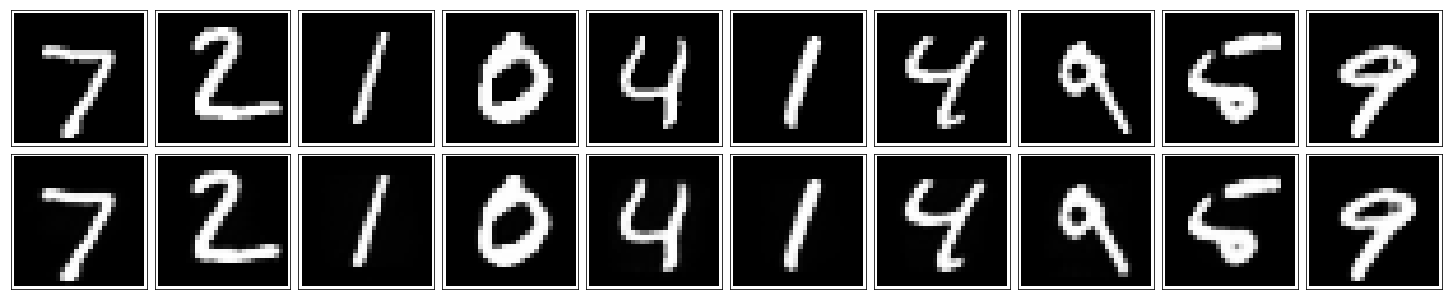

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [17]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.